<a href="https://colab.research.google.com/github/ilkert08/K-Means-from-scratch/blob/main/K_Means_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries



In [ ]:
import pandas as pd
import numpy as np
import math
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Distance Measuerment Functions

In [ ]:
def euclideanDistance(list1, list2): #Returns euclidean disatnace between 2 nodes.
  sum = 0
  for i in range(len(list1)):
    dif = (list1[i] - list2[i]) ** 2
    sum += dif
  result = math.sqrt(sum)
  return result


# Import dataset



In [ ]:
# import some data to play with
iris = datasets.load_iris()

limit = -1

x = iris.data[:limit,  :2]
y = iris.target[:limit]

# K Means

Class for clusters

In [ ]:
class Cluster:

  def __init__(self, centroid):
    self._members = []
    self._centroid = centroid

  def getMembers(self):
      return self._members

  def setMembers(self, value):
      self._members = value

  def getCentroid(self):
      return self._centroid

  def setCentroid(self, value):
      self._centroid = value

  def updateCentroid(self):
    newCentroid = []
    
    for i in range(len(self._members[0])):
      sum = 0
      for member in self._members:
        sum += member[i]
      newValue = sum / len(self._members)
      newCentroid.append(newValue)
      self._centroid = newCentroid

In [ ]:
def assignClusters(x, k = 3, clusters = []):
  if len(x) == 0  or (len(y)!= 0  and len(x) != len(y)):
    raise ValueError('Check dataset, there is a problem!')
  
  for data in x:
    minDistance = euclideanDistance(data, clusters[0].getCentroid())
    #print('-----------------------------------------------------------------------------------------')
    minIndex = 0
    for i in range(len(clusters)):
      cluster = clusters[i]
      tempDistance = euclideanDistance(data, cluster.getCentroid())
     # print("Temp Distance: " + str(tempDistance))

      if tempDistance < minDistance:
        minDistance = tempDistance
        minIndex = i
    #print('Min Index:' + str(minIndex))

    members = clusters[minIndex].getMembers()
    members.append(data)
    clusters[minIndex].setMembers(members)
    clusters[minIndex].updateCentroid()
  return clusters    

def assignFirstClusters(x, k = 3):
  clusters = []
  print(len(clusters))
  for i in range(k):  # We define first k element as centroids.
    cluster = Cluster(x[i])
    clusters.append(cluster) 
  return clusters


In [ ]:
def kMeans(x, epochs = 100, k = 3):
  
  clusters = assignFirstClusters(x, k = k)

  for i in range(epochs):
    print("-------------------------------------------------------------------------")
    print("Epoch " + str(i + 1) + ": ")
    clusters = assignClusters(x, k = k, clusters = clusters)
  return clusters

clusters = kMeans(x, epochs = 10, k = 3)

for cluster in clusters:
  print(cluster.getCentroid())



0
-------------------------------------------------------------------------
Epoch 1: 
-------------------------------------------------------------------------
Epoch 2: 
-------------------------------------------------------------------------
Epoch 3: 
-------------------------------------------------------------------------
Epoch 4: 
-------------------------------------------------------------------------
Epoch 5: 
-------------------------------------------------------------------------
Epoch 6: 
-------------------------------------------------------------------------
Epoch 7: 
-------------------------------------------------------------------------
Epoch 8: 
-------------------------------------------------------------------------
Epoch 9: 
-------------------------------------------------------------------------
Epoch 10: 
[6.596610169491517, 3.047919876733432]
[5.565306122448979, 2.639540816326532]
[4.995991091314032, 3.436971046770605]


# Visualize

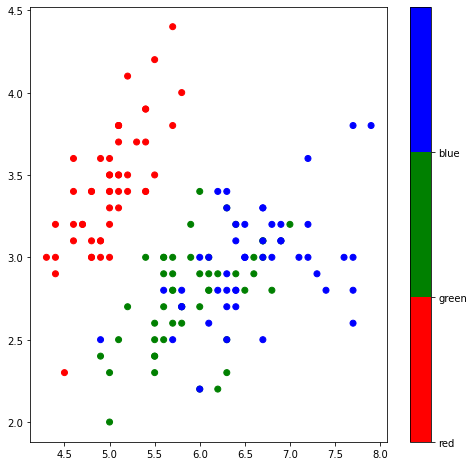

In [ ]:
x1 = x[:,0]
x2 = x[:,1]
label = [0,1,2,3,0,1,2,3]
colors = ['red','green','blue']





fig = plt.figure(figsize=(8,8))
plt.scatter(x1, x2, c=y, cmap=matplotlib.colors.ListedColormap(colors))
plt.sscatter(x1, x2, c=y, cmap=matplotlib.colors.ListedColormap(['yellow']))

cb = plt.colorbar()
loc = np.arange(0,max(y),max(y)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)